# LGBM & XGBM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Exploratory Data Analysis (EDA) and Data Preprocessing

In [2]:
data=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\15 XGBM & LGBM\Titanic_train.csv')

In [3]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
## Survived is our target column while remaining are features, however, PassengerId and Name has no importance so will drop them

In [5]:
data.drop(['Name','PassengerId'],axis=1,inplace=True)

In [6]:
data.shape

(891, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Cabin     204 non-null    object 
 9   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 69.7+ KB


In [8]:
data.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
## EDA Step 1 - check and treat null values

In [10]:
data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [11]:
## We have null values in Age, Cabin and Embarked columns. Since this a comparatively small dataset we will replace
## null values with median and mode respectively instead of dropping so as to avoid loss of data

In [12]:
median1=data['Age'].median()
median1

28.0

In [13]:
data['Age']=data['Age'].fillna(median1)

In [14]:
mode1=data['Cabin'].mode()
mode1

0        B96 B98
1    C23 C25 C27
2             G6
Name: Cabin, dtype: object

In [15]:
data['Cabin']=data['Cabin'].fillna(mode1[1])  ## we fill second mode

In [16]:
mode2=data['Embarked'].mode()
mode2

0    S
Name: Embarked, dtype: object

In [17]:
data['Embarked']=data['Embarked'].fillna(mode2[0])  ## we fill mode

In [18]:
data.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
Embarked    0
dtype: int64

In [19]:
## EDA Step 2 - check and treat duplicate rows

In [20]:
data.duplicated().any()  ## there are duplicate rows

True

In [21]:
data[data.duplicated()]  ## to check the exact duplicate row

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
201,0,3,male,28.00,8,2,CA. 2343,69.5500,C23 C25 C27,S
324,0,3,male,28.00,8,2,CA. 2343,69.5500,C23 C25 C27,S
409,0,3,female,28.00,3,1,4133,25.4667,C23 C25 C27,S
413,0,2,male,28.00,0,0,239853,0.0000,C23 C25 C27,S
466,0,2,male,28.00,0,0,239853,0.0000,C23 C25 C27,S
485,0,3,female,28.00,3,1,4133,25.4667,C23 C25 C27,S
612,1,3,female,28.00,1,0,367230,15.5000,C23 C25 C27,Q
641,1,1,female,24.00,0,0,PC 17477,69.3000,B35,C
644,1,3,female,0.75,2,1,2666,19.2583,C23 C25 C27,C
692,1,3,male,28.00,0,0,1601,56.4958,C23 C25 C27,S


In [22]:
data.drop_duplicates(inplace=True)  ## this will permanently delete the duplicate rows

In [23]:
data.duplicated().any()  ## to cross check if the duplicates are removed

False

In [24]:
## EDA Step 3 - check and treat outliers

In [25]:
## first we define numerical colums
num_col=[i for i in data.columns if data[i].dtypes!='O']
num_col

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

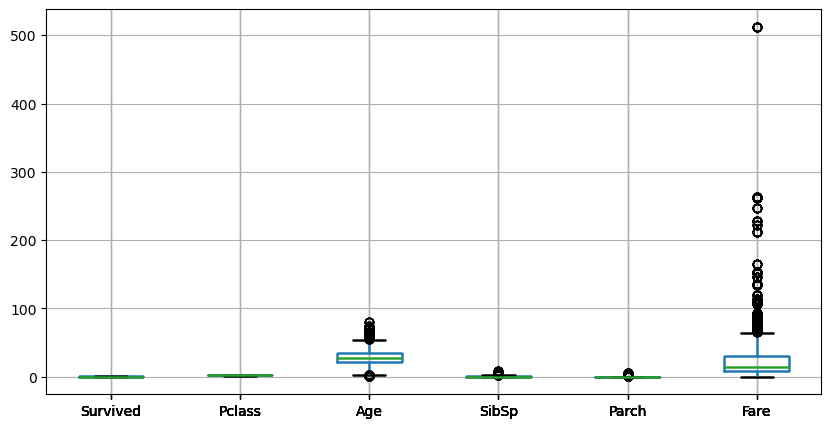

In [26]:
## we can draw boxplot to check for the outliers
for i in num_col:
    data.boxplot(column=num_col,figsize=(10,5))
plt.show()

In [27]:
## boxplot shows maximum outliers in Age and Fare columns however given this is a detail of paggenger in a ship, their extreme age and ticket fare
## may not be an outlier in the data. Hence we decide not to remove outliers.

In [28]:
## EDA Step 4 - correlation check using heatmap

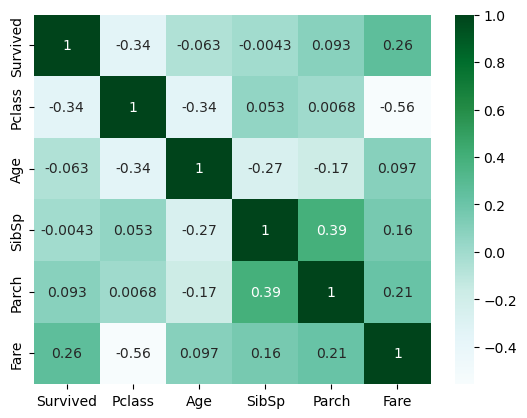

In [29]:
sns.heatmap(data[num_col].corr(),annot=True,cmap='BuGn')
plt.show();

In [30]:
## There doesn't seem to be much correlation between features and target

In [31]:
import warnings
warnings.filterwarnings('ignore')

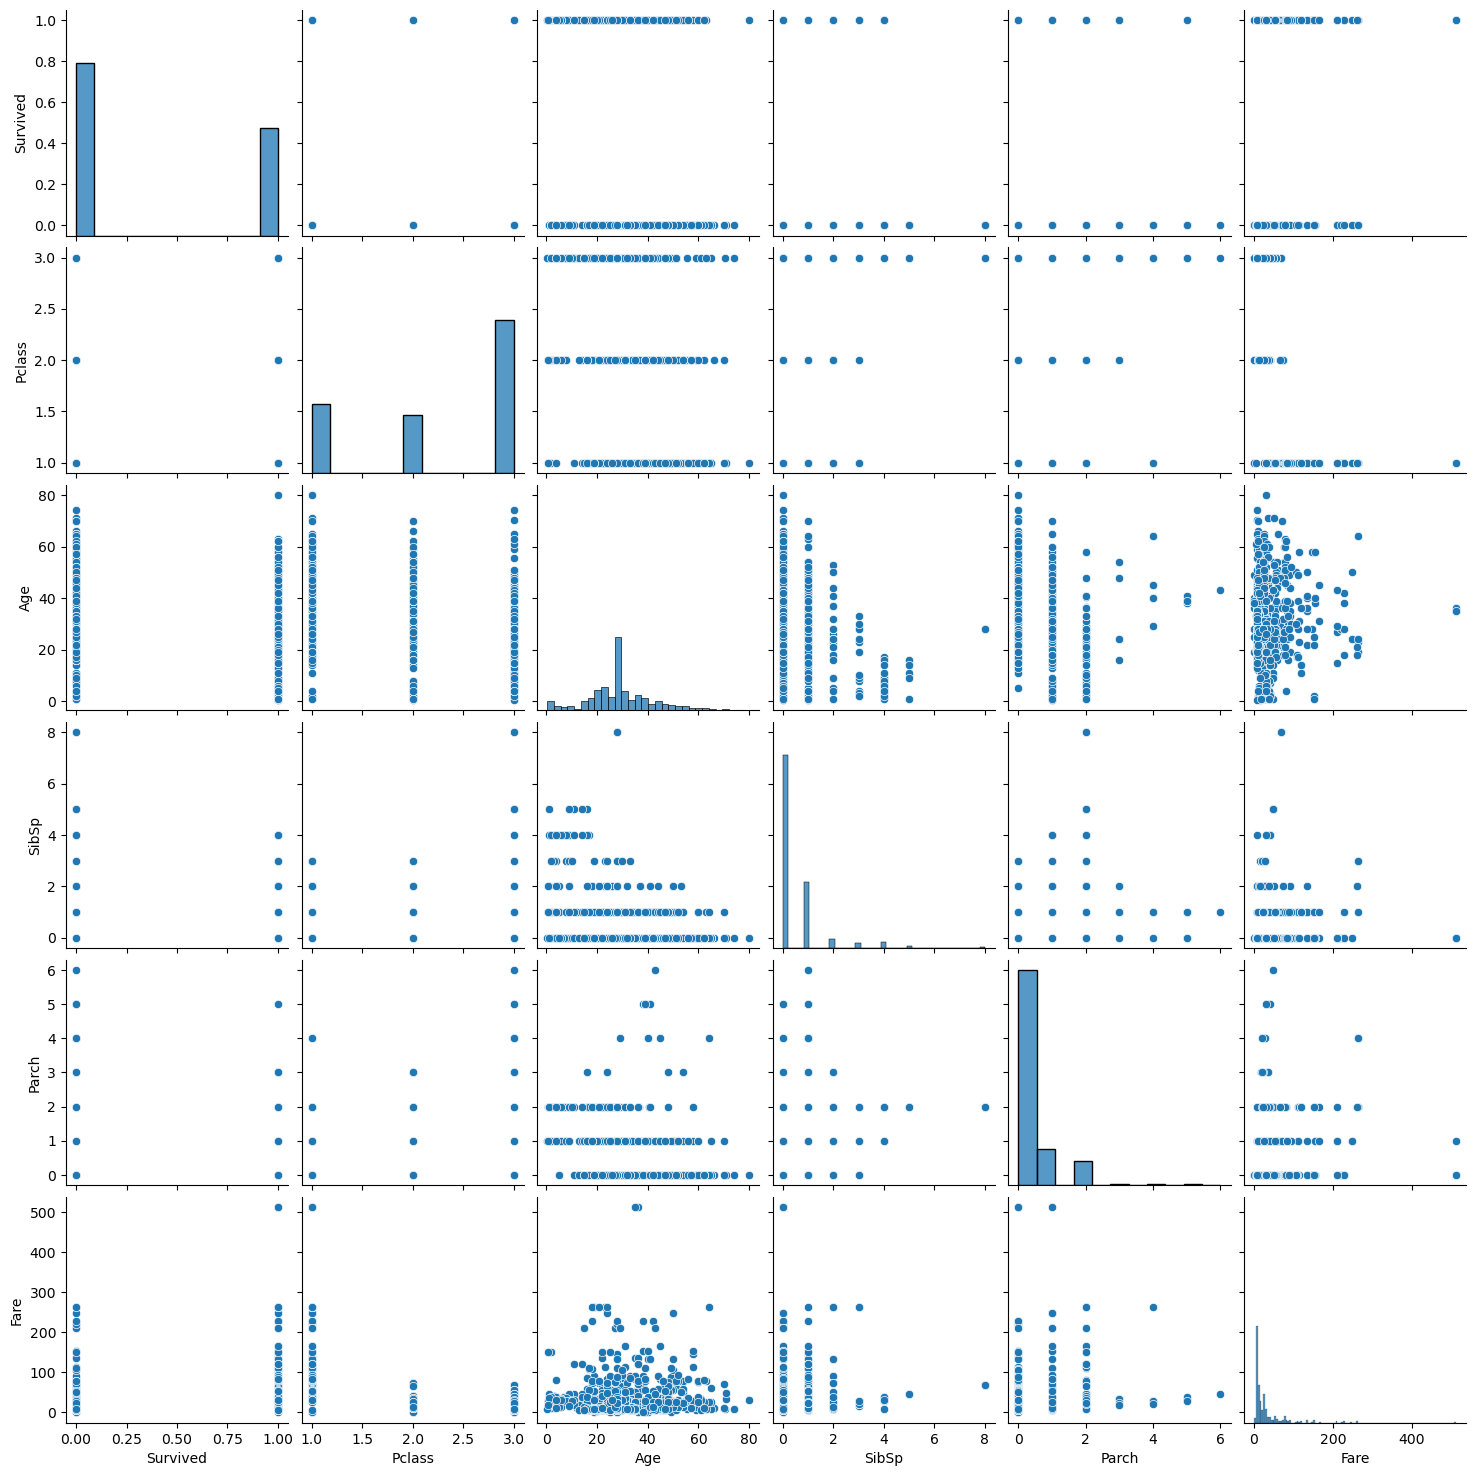

In [32]:
sns.pairplot(data[num_col])
plt.show();

In [33]:
## EDA Step 5 - Feature Engineering (converting categorical columns to numerical and standard scaling)

In [34]:
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [35]:
cat_col=[i for i in data.columns if data[i].dtypes=='O']
cat_col

['Sex', 'Ticket', 'Cabin', 'Embarked']

In [36]:
data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [37]:
data['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [38]:
data['Cabin'].unique()

array(['C23 C25 C27', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33', 'F G73', 'E31',
       'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101', 'F E69', 'D47',
       'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4', 'A32', 'B4',
       'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35', 'C87', 'B77',
       'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19', 'B49', 'D',
       'C22 C26', 'C106', 'C65', 'E36', 'C54', 'B57 B59 B63 B66', 'C7',
       'E34', 'C32', 'B18', 'C124', 'C91', 'E40', 'T', 'C128', 'D37',
       'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44', 'A34', 'C104',
       'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14', 'B37', 'C30',
       'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38', 'B39', 'B22',
       'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68', 'B41', 'A20',
       'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48', 'E58', 'C126',
       'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63', 'C62 C64',
       'E24

In [39]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [40]:
ord_enc=OrdinalEncoder()

In [41]:
data['Ticket']=ord_enc.fit_transform(data[['Ticket']])  ## coverting Ticket column to numerical

In [42]:
data['Cabin']=ord_enc.fit_transform(data[['Cabin']])  ## coverting Cabin column to numerical

In [43]:
data['Embarked']=ord_enc.fit_transform(data[['Embarked']])  ## coverting Embarked column to numerical

In [44]:
data['Sex']=ord_enc.fit_transform(data[['Sex']])  ## coverting Sex column to numerical

In [45]:
data[cat_col]

,Sex,Ticket,Cabin,Embarked
0,1.0,523.0,63.0,2.0
1,0.0,596.0,81.0,0.0
2,0.0,669.0,63.0,2.0
3,0.0,49.0,55.0,2.0
4,1.0,472.0,63.0,2.0
...,...,...,...,...
886,1.0,101.0,63.0,2.0
887,0.0,14.0,30.0,2.0
888,0.0,675.0,63.0,2.0
889,1.0,8.0,60.0,0.0


In [46]:
## Now we apply standard scaler to all the columns, before that we need to split features and target

In [47]:
target=data[['Survived']]
features=data.drop('Survived',axis=1)

In [48]:
std_sca=StandardScaler()

In [49]:
features=pd.DataFrame(std_sca.fit_transform(features),columns=features.columns)
features

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0.834989,0.735182,-0.566559,0.554101,-0.464661,0.921557,-0.495460,-0.146282,0.586522
1,-1.552644,-1.360207,0.655523,0.554101,-0.464661,1.285524,0.786013,0.709881,-1.941588
2,0.834989,-1.360207,-0.261038,-0.502192,-0.464661,1.649492,-0.481951,-0.146282,0.586522
3,-1.552644,-1.360207,0.426382,0.554101,-0.464661,-1.441738,0.422118,-0.526798,0.586522
4,0.834989,0.735182,0.426382,-0.502192,-0.464661,0.667278,-0.479450,-0.146282,0.586522
...,...,...,...,...,...,...,...,...,...
870,-0.358827,0.735182,-0.184658,-0.502192,-0.464661,-1.182474,-0.380388,-0.146282,0.586522
871,-1.552644,-1.360207,-0.795699,-0.502192,-0.464661,-1.616243,-0.040173,-1.715913,0.586522
872,0.834989,-1.360207,-0.108278,0.554101,2.029685,1.679407,-0.171256,-0.146282,0.586522
873,-1.552644,0.735182,-0.261038,-0.502192,-0.464661,-1.646158,-0.040173,-0.288975,-1.941588


In [50]:
target

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


## Building Predictive Models & Comparative Analysis

### XGBM Model

In [51]:
!pip install Xgboost

In [52]:
import xgboost as xgb

In [53]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report

In [54]:
## train test split
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.8,random_state=100)

In [55]:
## define xgb using 100 estimators and default hyperparameters
#xgb=xgb.XGBClassifier(n_estimator=100,learning_rate=0.5,gamma=1,reg_lambda=1,min_child_weight=1)

In [56]:
## build XGBM model
#xgb.fit(x_train,y_train)

In [57]:
## predict target using this model
#y_pred_xg=xgb.predict(x_test)

In [58]:
## check accuracy
#accuracy_score(y_test,y_pred_xg)

In [59]:
#print(classification_report(y_test,y_pred_xg))

In [60]:
## Accuracy is 78% and f1 score is 84% for class 0 and 66% for class 1

In [61]:
## Tried using different values of hyperparameters however once XGBClassifier is defined, in the second instance it throws error hence commenting out first set of codes and rebuilding model with better hyperparameters.

In [62]:
xgb=xgb.XGBClassifier(n_estimator=100,learning_rate=0.3,gamma=0,reg_lambda=1,min_child_weight=1)

In [63]:
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.3, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimator=100, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [64]:
y_pred_xg=pd.DataFrame(xgb.predict(x_test),columns=y_test.columns)

In [65]:
accuracy_score(y_test,y_pred_xg)

0.8

In [66]:
print(classification_report(y_test,y_pred_xg))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       114
           1       0.72      0.69      0.71        61

    accuracy                           0.80       175
   macro avg       0.78      0.77      0.78       175
weighted avg       0.80      0.80      0.80       175



In [67]:
## This model shows better results. Accuracy is 80%, F1 score is 85% for class 0 and 71% for class 1

In [68]:
## we will now check training validation
y_pred_xg_train=xgb.predict(x_train)
accuracy_score(y_train,y_pred_xg_train)

0.9957142857142857

In [69]:
print(classification_report(y_train,y_pred_xg_train))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       425
           1       1.00      0.99      0.99       275

    accuracy                           1.00       700
   macro avg       1.00      0.99      1.00       700
weighted avg       1.00      1.00      1.00       700



In [70]:
## Since training accuracy is 100% and testing accuracy is 80% it is clear from above validations that the model seems to be overfit.

In [72]:
print(y_test.shape)
print(y_pred_xg.shape)

(175, 1)
(175, 1)


In [73]:
y_test_plot=y_test.reset_index()

In [74]:
y_test_plot.drop('index',axis=1,inplace=True)

In [75]:
y_pred_xg.rename(columns={'Survived':'Survived_pred'},inplace=True)

In [76]:
XGBM_plot=pd.concat([y_test_plot,y_pred_xg],axis=1)

In [77]:
XGBM_plot

,Survived,Survived_pred
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
170,1,1
171,0,0
172,0,0
173,0,0


### LGBM Model

In [79]:
## install LGBM package
!pip install lightgbm

In [80]:
import lightgbm as lgb

In [81]:
lgb=lgb.LGBMClassifier(n_estimators=100,max_depth=3,max_bin=10,boosting_type='gbdt',top_rate=0.3,other_rate=0.2,data_sample_strategy='goss')

In [82]:
lgb.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 275, number of negative: 425
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000099 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 9
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.392857 -> initscore=-0.435318
[LightGBM] [Info] Start training from score -0.435318
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with pos

LGBMClassifier(data_sample_strategy='goss', max_bin=10, max_depth=3,
               other_rate=0.2, top_rate=0.3)

In [83]:
y_pred_lg=lgb.predict(x_test)

In [84]:
accuracy_score(y_test,y_pred_lg)

0.8171428571428572

In [85]:
print(classification_report(y_test,y_pred_lg))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87       114
           1       0.82      0.61      0.70        61

    accuracy                           0.82       175
   macro avg       0.82      0.77      0.78       175
weighted avg       0.82      0.82      0.81       175



In [86]:
## accuracy using LGBM slightly increased to 82% as compared to 80% in XGBM, with F1 score as 87% and 70% for class 0 and 1 respectively.

In [87]:
y_pred_lg_train=lgb.predict(x_train)

In [88]:
accuracy_score(y_train,y_pred_lg_train)

0.8685714285714285

In [89]:
print(classification_report(y_train,y_pred_lg_train))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90       425
           1       0.89      0.76      0.82       275

    accuracy                           0.87       700
   macro avg       0.87      0.85      0.86       700
weighted avg       0.87      0.87      0.87       700



In [90]:
## training validation accuracy is 87% with F1 score as 90% and 82% for class 0 and 1 respectively. This shows the model is not overfit as the case with XGBM

#### Cross Validation - Stratified KFold

In [91]:
from sklearn.model_selection import LeaveOneOut,KFold,StratifiedKFold,cross_val_score

In [92]:
str_kf=StratifiedKFold(n_splits=5,shuffle=True)

In [93]:
for train_split,test_split in str_kf.split(features,target):
    print(train_split,test_split)

[  0   2   3   4   5   6   7   9  10  11  12  13  14  15  19  21  23  24
  25  26  27  28  29  32  33  34  35  37  38  39  40  41  43  44  45  46
  47  48  49  50  52  54  55  56  57  58  60  61  62  64  65  66  67  68
  70  72  75  76  77  78  80  82  83  84  86  87  89  90  91  92  93  95
  96  97  98  99 100 101 102 103 105 106 107 108 109 112 113 115 117 118
 119 120 121 122 123 124 125 126 127 129 130 131 133 135 139 140 141 142
 143 144 145 146 147 148 150 151 153 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 174 175 176 178 179 181 182 183 184
 185 186 187 188 189 191 193 194 195 196 197 198 199 202 203 205 207 209
 210 212 213 214 215 216 217 218 220 221 222 223 225 227 228 230 231 232
 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250
 251 252 253 255 256 257 258 259 260 261 262 263 265 266 267 268 269 270
 271 272 273 274 275 276 277 279 280 281 282 284 285 286 287 288 289 290
 291 294 295 296 297 298 299 301 302 304 305 306 30

In [94]:
cross_val_score(lgb,features,target,scoring='accuracy',cv=str_kf).mean()

[LightGBM] [Info] Number of positive: 269, number of negative: 431
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 67
[LightGBM] [Info] Number of data points in the train set: 700, number of used features: 9
[LightGBM] [Info] Using GOSS
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.384286 -> initscore=-0.471397
[LightGBM] [Info] Start training from score -0.471397
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further spli

0.8217142857142857

In [95]:
## accuracy of the LGBM model is verified using Stratified KFold method

In [96]:
## Leave One Out method is not feasible hence we have used only Stratified KFold

### Submission Requirements

In [99]:
## comparative analysis results and practical implications
## We have already seen performance of both XGBM and LGBM models in training and testing validations
## Both the algorithms perform similarly in terms of model performance, but LightGBM training happens within a fraction of the time required by XGBoost.
## Fast training in LightGBM makes it the good choice for machine learning experiments.
## XGBoost requires a lot of resources to train on large amounts of data, which makes it an accessible option for most enterprises, while LightGBM is lightweight and can be used on modest hardware.
## Hyperparameter tuning is extremely important in both algorithms.